### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-02/12/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [5]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [6]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 3, 1))
x_test = x_test.reshape((n_samples_test, 22, 3, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3, 1)
(288, 22, 3, 1)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 [==============================] - 0s 138us/sample - loss: 1.6887 - acc: 0.4271
kappa:  0.23611111111111116
confusion matrix:
 [[28 22  9 13]
 [11 25 20 16]
 [ 6 15 37 14]
 [ 9  7 23 33]]
(0.4326945556231674, 0.4270833333333333, 0.42615691216523777, None)


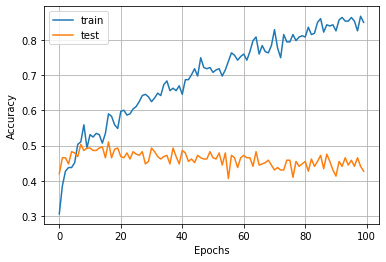

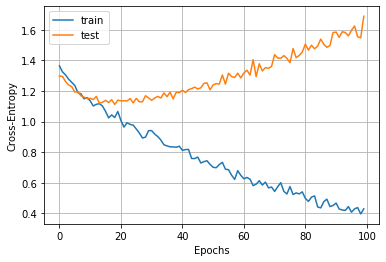

Iteration: 2
288/288 [==============================] - 0s 90us/sample - loss: 1.7126 - acc: 0.4444
kappa:  0.2592592592592593
confusion matrix:
 [[28 24  8 12]
 [ 8 37 12 15]
 [ 5 21 27 19]
 [ 7 12 17 36]]
(0.4594624362134579, 0.4444444444444444, 0.4442602725646666, None)


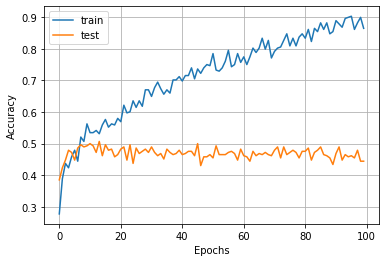

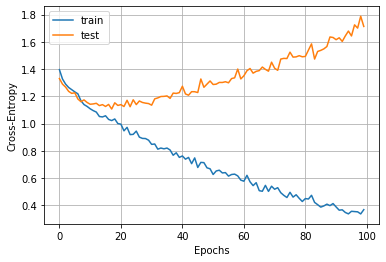

Iteration: 3
288/288 [==============================] - 0s 78us/sample - loss: 1.5925 - acc: 0.4757
kappa:  0.30092592592592593
confusion matrix:
 [[35 23  4 10]
 [ 8 36 13 15]
 [10 21 23 18]
 [ 8  9 12 43]]
(0.4801431415333607, 0.4756944444444444, 0.4721980744554054, None)


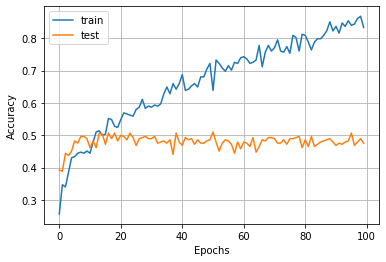

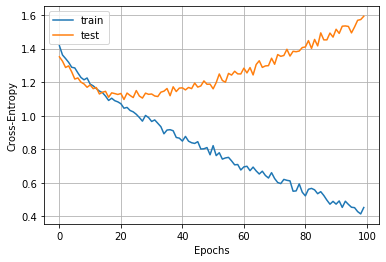

Iteration: 4
288/288 [==============================] - 0s 85us/sample - loss: 1.6938 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[37 18  8  9]
 [ 9 26 18 19]
 [ 6 19 36 11]
 [11 10 23 28]]
(0.44622645759728274, 0.4409722222222222, 0.44206131543992416, None)


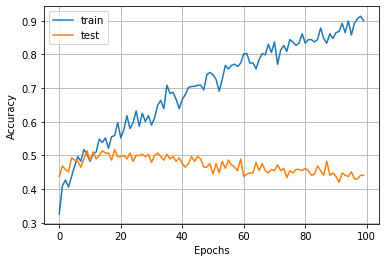

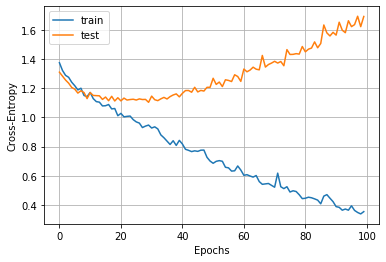

Iteration: 5
288/288 [==============================] - 0s 82us/sample - loss: 1.5887 - acc: 0.4618
kappa:  0.28240740740740744
confusion matrix:
 [[31 24  7 10]
 [ 9 39 10 14]
 [ 9 19 25 19]
 [ 6 17 11 38]]
(0.4746024183131101, 0.4618055555555556, 0.46026533834973415, None)


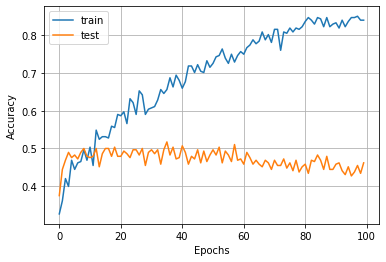

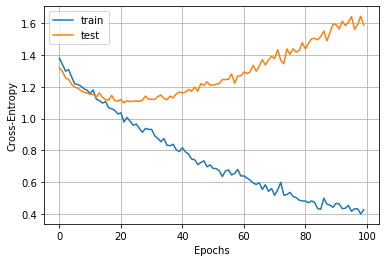

Iteration: 6
288/288 [==============================] - 0s 101us/sample - loss: 1.7038 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[28 22 11 11]
 [ 5 31 17 19]
 [ 6 18 32 16]
 [12 10 14 36]]
(0.45079811997554703, 0.4409722222222222, 0.44160048573287314, None)


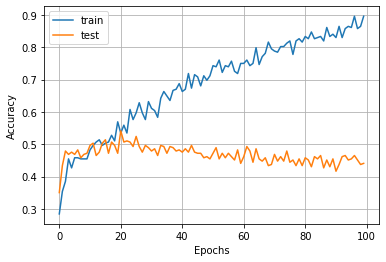

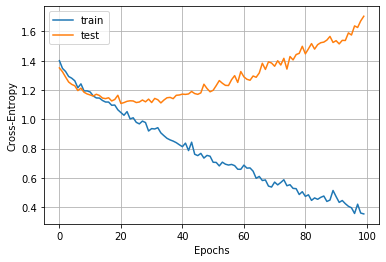

Iteration: 7
288/288 [==============================] - 0s 97us/sample - loss: 1.6727 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[32 24  7  9]
 [ 9 34 13 16]
 [ 7 19 34 12]
 [14 11 20 27]]
(0.4459567820202901, 0.4409722222222222, 0.44135604712136334, None)


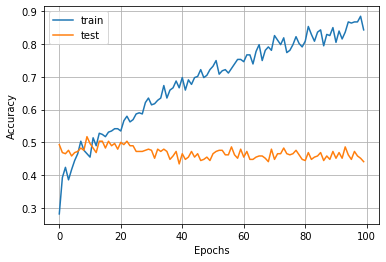

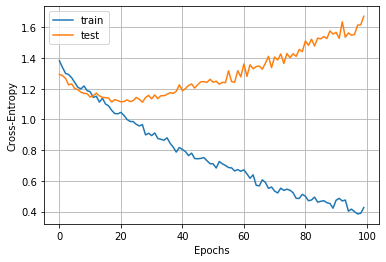

Iteration: 8
288/288 [==============================] - 0s 95us/sample - loss: 1.5847 - acc: 0.4375
kappa:  0.25
confusion matrix:
 [[31 17 10 14]
 [ 8 34 16 14]
 [10 19 30 13]
 [ 9 12 20 31]]
(0.4436023256557429, 0.4375, 0.4386106198606199, None)


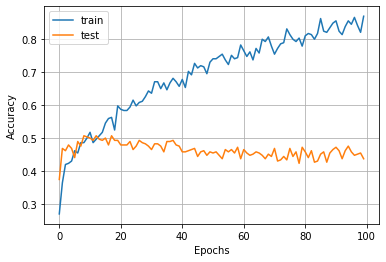

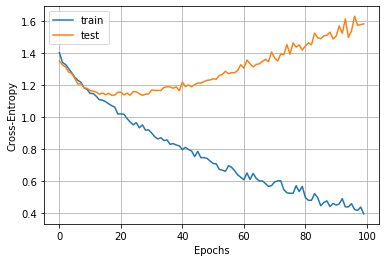

Iteration: 9
288/288 [==============================] - 0s 98us/sample - loss: 1.5341 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[30 25  7 10]
 [ 7 40 10 15]
 [ 8 18 32 14]
 [ 7 12 19 34]]
(0.483579342113419, 0.4722222222222222, 0.47225531457345915, None)


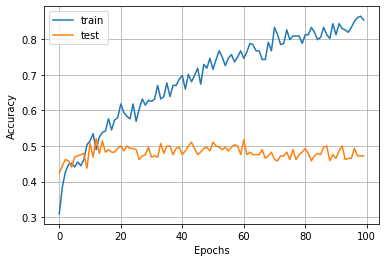

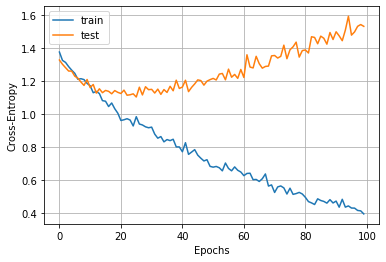

Iteration: 10
288/288 [==============================] - 0s 86us/sample - loss: 1.7320 - acc: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[32 24  5 11]
 [ 7 44  8 13]
 [ 6 25 26 15]
 [11 15  7 39]]
(0.5110133425350817, 0.48958333333333337, 0.487391713747646, None)


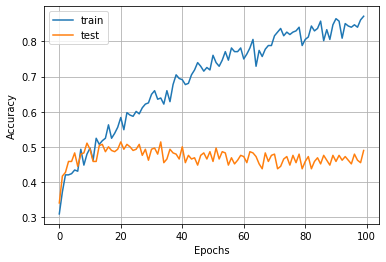

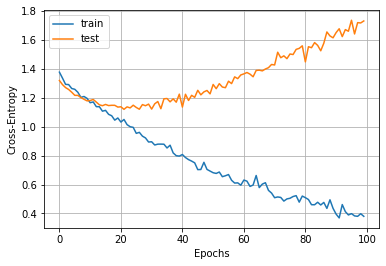


Resultados:
loss: [1.6886503961351182, 1.712560733159383, 1.5924964083565607, 1.6937717729144626, 1.5886839230855305, 1.7037963204913669, 1.6727068689134386, 1.5847308768166437, 1.5340581006473966, 1.7320382727517023]
accuracy: [0.42708334, 0.44444445, 0.47569445, 0.4409722, 0.46180555, 0.4409722, 0.4409722, 0.4375, 0.4722222, 0.48958334]
kappa: [0.23611111111111116, 0.2592592592592593, 0.30092592592592593, 0.25462962962962965, 0.28240740740740744, 0.25462962962962965, 0.25462962962962965, 0.25, 0.2962962962962963, 0.3194444444444444]
precision: [0.4326945556231674, 0.4594624362134579, 0.4801431415333607, 0.44622645759728274, 0.4746024183131101, 0.45079811997554703, 0.4459567820202901, 0.4436023256557429, 0.483579342113419, 0.5110133425350817]
recall: [0.4270833333333333, 0.4444444444444444, 0.4756944444444444, 0.4409722222222222, 0.4618055555555556, 0.4409722222222222, 0.4409722222222222, 0.4375, 0.4722222222222222, 0.48958333333333337]
f1: [0.42615691216523777, 0.4442602725646666, 0

In [10]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(22,3,1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [11]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 20, 1, 32)         320       
_________________________________________________________________
flatten_9 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                20512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 20,964
Trainable params: 20,964
Non-trainable params: 0
_________________________________________________________________


In [12]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4531
std: (+/- 0.0193)
kappa: 0.2708
std: 0.0257
precision: 0.4628
recall: 0.4531
f1: 0.4526
